# Midterm: Classification Analysis

Name: Mindy Cruz         
Date: 4/6/2025 

__Objective:__

This project demonstrates your ability to apply classification modeling techniques to a real-world dataset. You will:

- Load and explore a dataset.
- Analyze feature distributions and consider feature selection.
- Train and evaluate a classification model.
- Compare different classification approaches.
- Document your work in a structured Jupyter Notebook.
- Conduct a peer review of a classmate’s project.

__Intoduction:__

- using the UCI Mushroom Dataset, I will to predict whether a mushroom is poisonous or edible. 


# Section 1: Import and Inspect the Data

In [420]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


__1.1 Load Dataset and Display__

*UCI Mushroom Dataset*

In [401]:
#load dataset 
df= pd.read_csv(r"C:\Users\cruzm\44670 Projects\applied-ml-mcruz\midterm\agaricus-lepiota.data", delimiter=",", header= None)

#display the column names, null counts and datatypes
df.info()

#assign headers
headers = [
    'poisonous', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 
    'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 
    'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 
    'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat'
]

df.columns=headers
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       8124 non-null   object
 1   1       8124 non-null   object
 2   2       8124 non-null   object
 3   3       8124 non-null   object
 4   4       8124 non-null   object
 5   5       8124 non-null   object
 6   6       8124 non-null   object
 7   7       8124 non-null   object
 8   8       8124 non-null   object
 9   9       8124 non-null   object
 10  10      8124 non-null   object
 11  11      8124 non-null   object
 12  12      8124 non-null   object
 13  13      8124 non-null   object
 14  14      8124 non-null   object
 15  15      8124 non-null   object
 16  16      8124 non-null   object
 17  17      8124 non-null   object
 18  18      8124 non-null   object
 19  19      8124 non-null   object
 20  20      8124 non-null   object
 21  21      8124 non-null   object
 22  22      8124 non-null   

In [402]:
#display the first 10 rows
print(df.head(10))


  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   
5         e         x           y         y       t    a               f   
6         e         b           s         w       t    a               f   
7         e         b           y         w       t    l               f   
8         p         x           y         w       t    p               f   
9         e         b           s         y       t    a               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b 

__1.2 Check for missing values and display summary statistics__

In [403]:

#check for missing values
print("Missing Values:")
print(df.isnull().sum())


Missing Values:
poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [404]:
#display summary stats
print(df.describe())

       poisonous cap-shape cap-surface cap-color bruises  odor  \
count       8124      8124        8124      8124    8124  8124   
unique         2         6           4        10       2     9   
top            e         x           y         n       f     n   
freq        4208      3656        3244      2284    4748  3528   

       gill-attachment gill-spacing gill-size gill-color  ...  \
count             8124         8124      8124       8124  ...   
unique               2            2         2         12  ...   
top                  f            c         b          b  ...   
freq              7914         6812      5612       1728  ...   

       stalk-surface-below-ring stalk-color-above-ring stalk-color-below-ring  \
count                      8124                   8124                   8124   
unique                        4                      9                      9   
top                           s                      w                      w   
freq               

__Reflection 1:__

- *What do you notice about the dataset?*

    - no missing data points,  8124 entries, 23 categories/features, dtype is object. 

- *Are there any data issues?*

    - I do not see any issues with the data


# Section 2: Data Exploration and Preparation



__2.1 Explore data patterns and distributions__

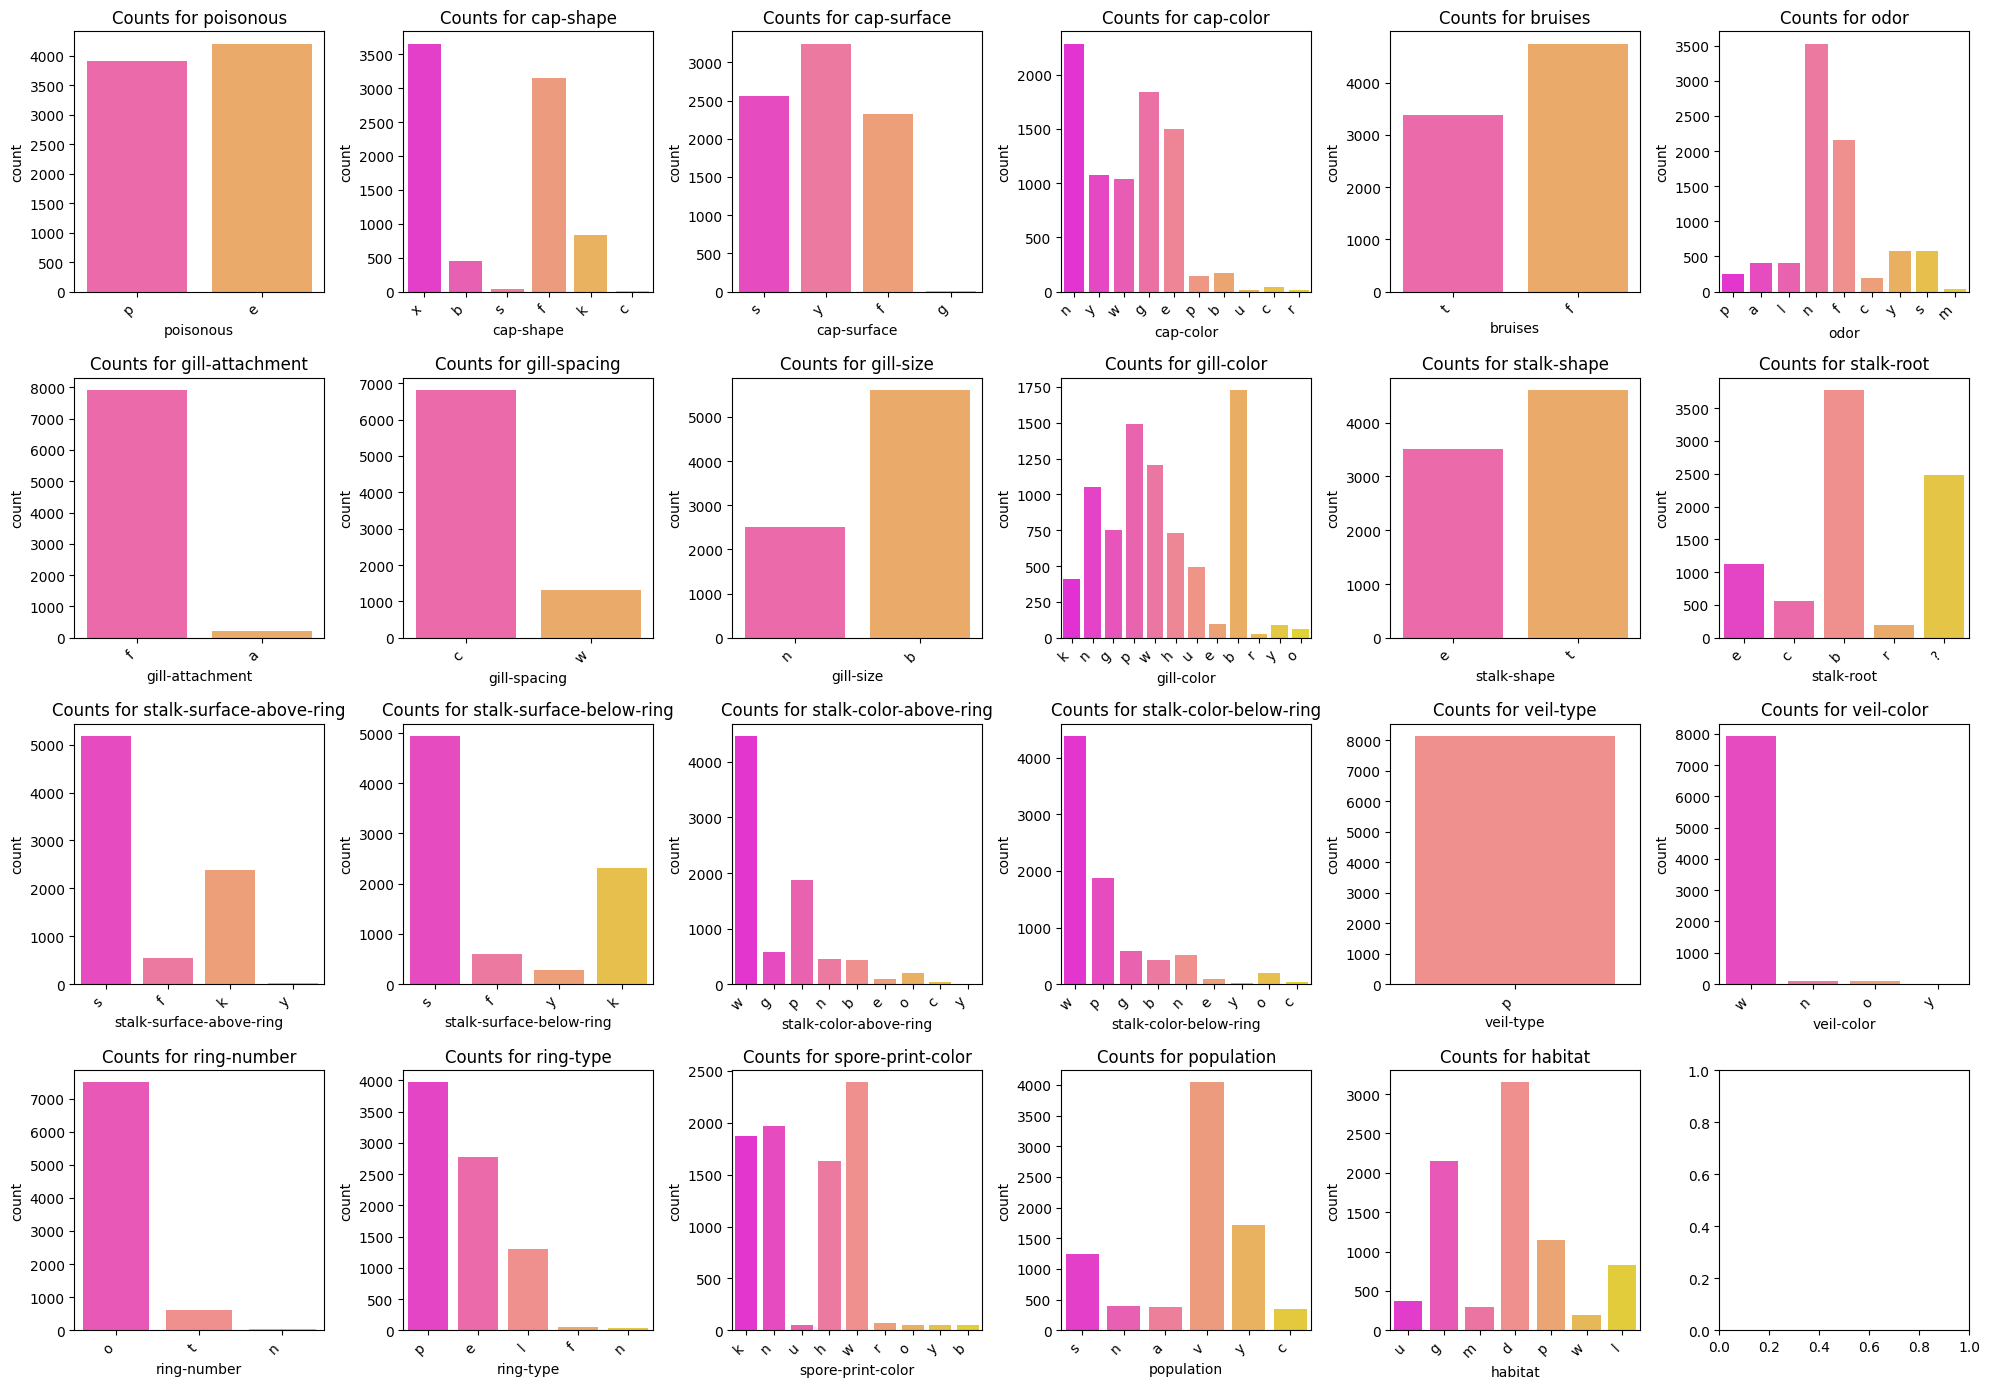

In [405]:
#count plots

def plot_counts(df, column_name, color='spring', ax=None):
    sns.countplot(data=df, x=column_name, hue=column_name, palette=color, legend=False, ax=ax)
    ax.set_title(f'Counts for {column_name}')
    
    # Set tick labels and rotate them
    ticks = ax.get_xticks()  
    ax.set_xticks(ticks)  
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  

# Create a grid for plotting multiple countplots
n_cols = 6 
n_rows = (len(df.columns) // n_cols) + (len(df.columns) % n_cols > 0)  
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 14)) 
axes = axes.flatten()  


for i, column in enumerate (df.columns):
    plot_counts(df, column, color='spring', ax=axes[i])

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

__Observation:__

Count plots give us a good idea of how this the data can relate to each other. When looking at the data and what the is trying to be determined, the first graph in the block of graphs is simple and to the point, its is Showing ups the amount of Mushrooms that are Posionous vs Edible. 

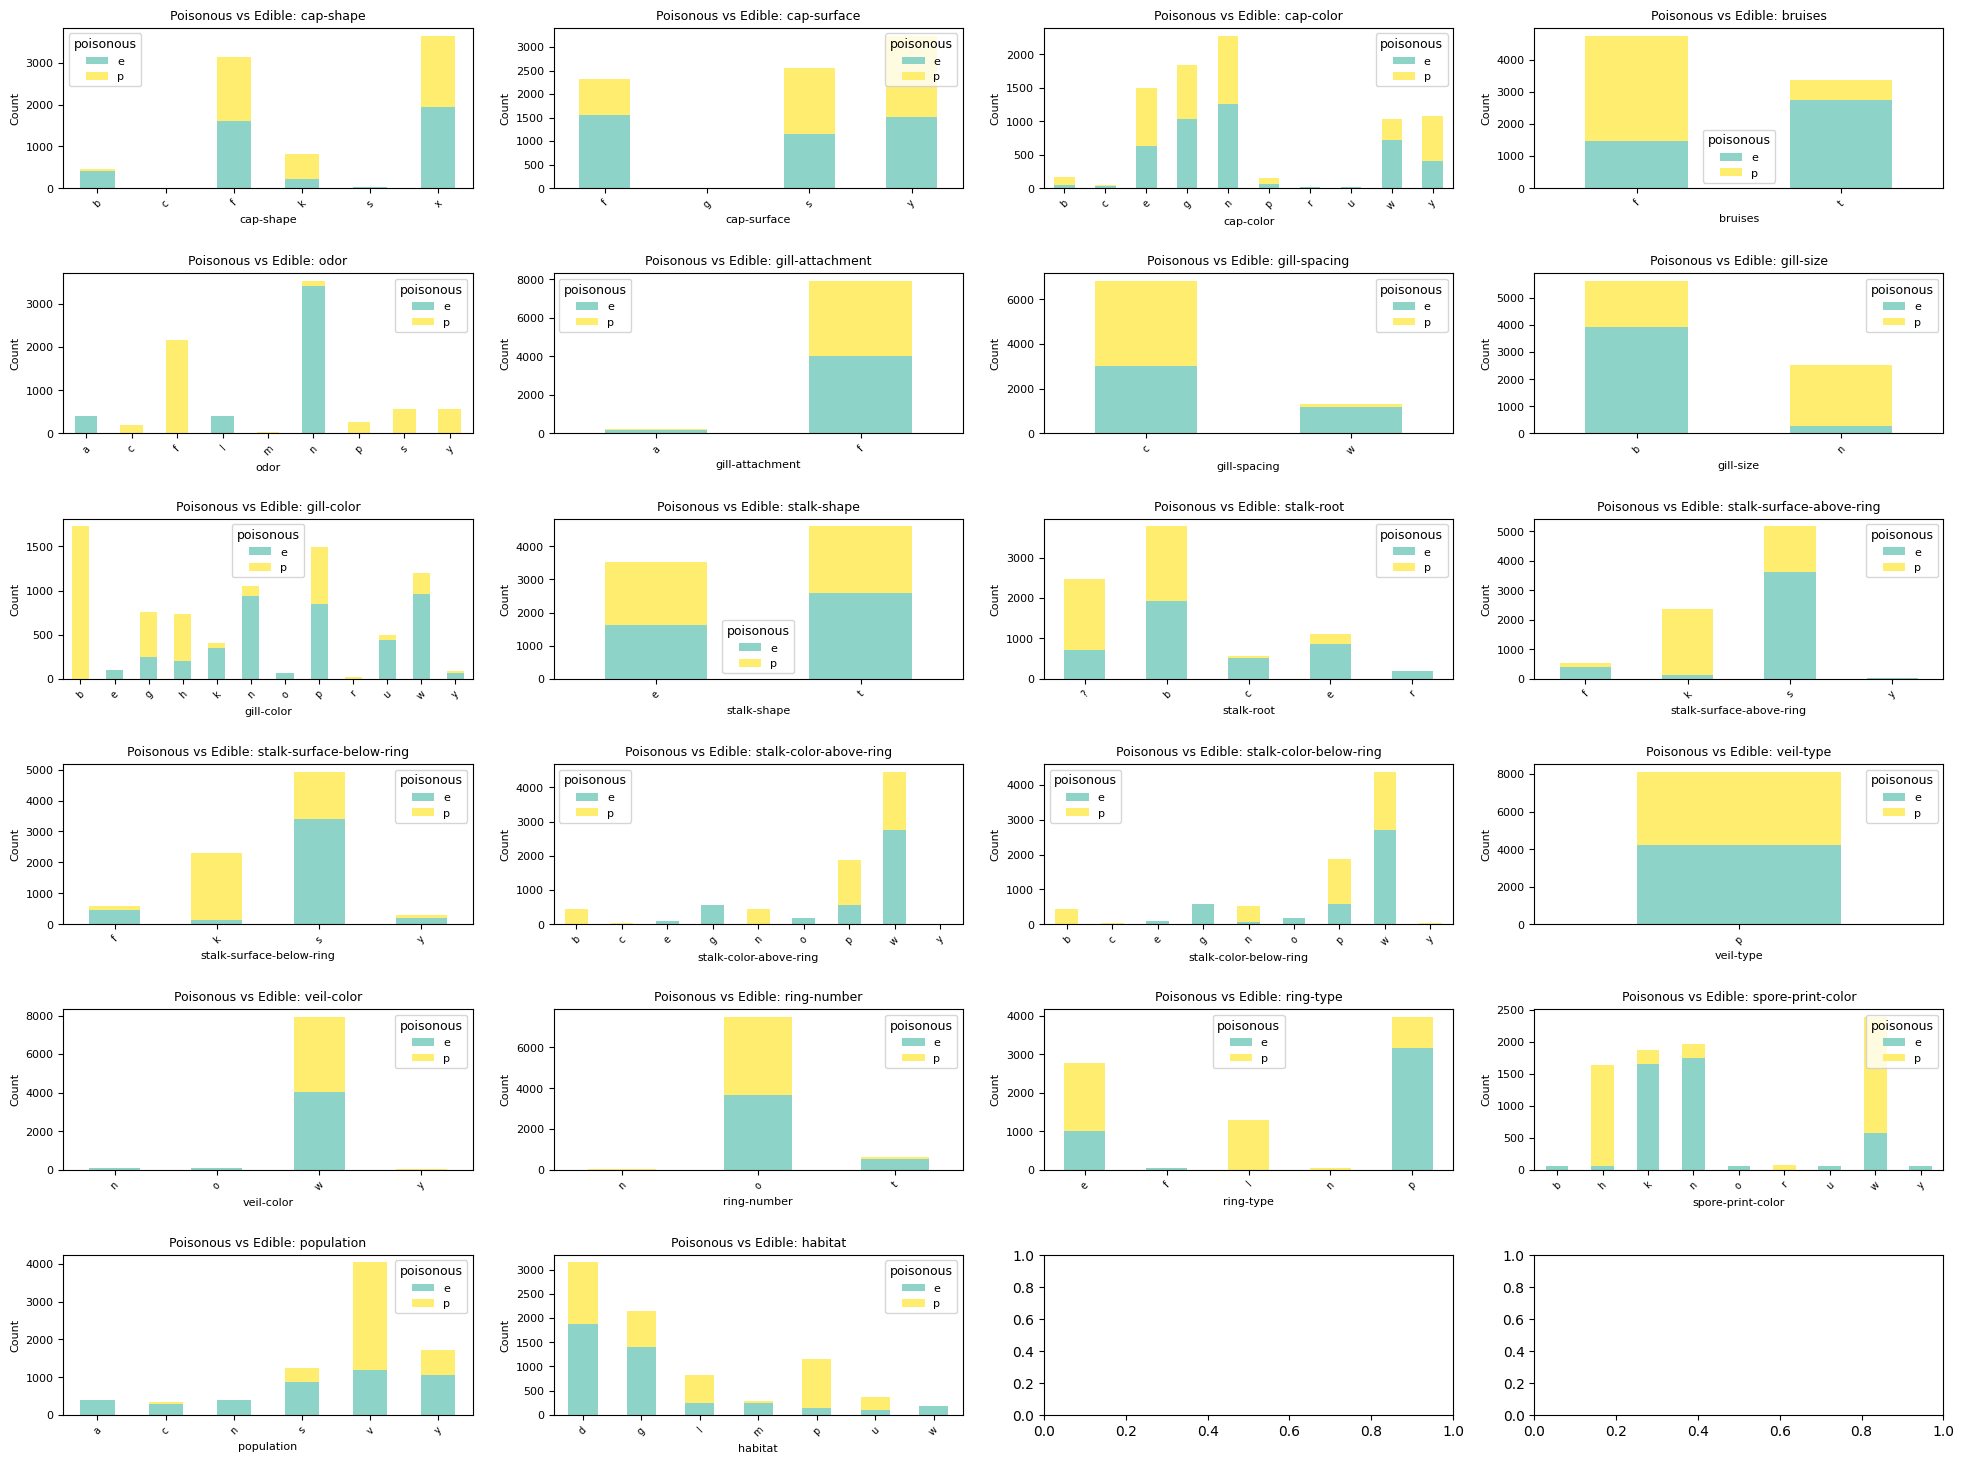

In [406]:
# Stack Bar Chart

targ_col = 'poisonous'

# Number of features excluding the target column
num_features = len(df.columns) - 1

# Define grid size for subplots
rows = 6
cols = 4

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 15))

# Flatten axes array to easily loop over it
axes = axes.flatten()


plot_index = 0
for feature in df.columns:
    if feature == targ_col:
        continue
    
    cross_tab = pd.crosstab(df[feature], df[targ_col])

    ax = axes[plot_index]
    cross_tab.plot(kind='bar', stacked=True, colormap='Set3', ax=ax)
    ax.set_title(f'Poisonous vs Edible: {feature}', fontsize=9)
    ax.set_xlabel(feature, fontsize=8)
    ax.set_ylabel('Count', fontsize=8)
    ax.legend(title=targ_col, fontsize=8, title_fontsize=9)
    ax.tick_params(axis='x', rotation=45, labelsize=7)
    ax.tick_params(axis='y', labelsize=8)
    
    plot_index += 1

# Adjust layout to prevent overlap
plt.tight_layout(pad=2.0)
plt.show()


__2.2 Handle missing values and clean data__

In [407]:
#Check for missing values

missing_values = df.isnull().sum()
print("Missing values: \n", missing_values)


Missing values: 
 poisonous                   0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


__Observations:__

There is no missing data. We had determined this when we loaded the data in section 1. 

In section one I had already did some data cleaning by pulling in column names instead of just using the nubmers/single letters. For the purpose of this project I feel like that is all I really needed to do for this. 

__2.3 Feature selection and engineering__


In [408]:
#Combine 'stalk-surface-above-ring' and 'stalk-surface-below-ring'

df['stalk-surface-combined'] = df['stalk-surface-above-ring'] + '_' + df['stalk-surface-below-ring']

# One-hot encode the new combined feature
X_encoded = pd.get_dummies(df, columns=['stalk-surface-combined'], drop_first=True)

# View the updated DataFrame
print(X_encoded.head())



  poisonous cap-shape cap-surface cap-color bruises odor gill-attachment  \
0         p         x           s         n       t    p               f   
1         e         x           s         y       t    a               f   
2         e         b           s         w       t    l               f   
3         p         x           y         w       t    p               f   
4         e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... habitat stalk-surface-combined_f_s  \
0            c         n          k  ...       u                      False   
1            c         b          k  ...       g                      False   
2            c         b          n  ...       m                      False   
3            c         n          n  ...       u                      False   
4            w         b          k  ...       g                      False   

  stalk-surface-combined_k_k stalk-surface-combined_k_s  \
0        

__Reflection 2:__ 

- *What patterns or anomalies do you see? Do any features stand out?*
    - There is a a fairly even amount of both poisonous and edible. I think its interesting that we see phyiscal characteristics for the most part and also split evenly. I like the way the stack bar charts displays the data.
- *What preprocessing steps were necessary to clean and improve the data?* 
- *Did you create or modify any features to improve performance?*
    - I tried to create combined stalk surface category. 

# Section 3: Feature Selcetion and Justification


__3.1 Choose features and target__

__Case 1:__

- input: odor
- target: poisonous

__Case 2:__

- input: bruise
- target: poisonous

__Case 3:__

- input: habitat
- target: poisonous



__3.2 Define X and y

In [409]:
#case 1
X1 = df [['odor']]
y1 = df [['poisonous']]

# case 2
X2 = df [['bruises']]
y2 = df [['poisonous']]

# case 3
X3 = df [['habitat']]
y3 = df [['poisonous']]

__Reflection 3:__ 
- *Why did you choose these features? How might they impact predictions or accuracy?*
    - I chose the above features because these factors are easily identifiable. We can see bruises, we can smell odor and we can observe a habitiat. In regards to accuracy, I think that the results should match our predeictions. 
    

 # Section 4: Train a Model- Decision Tree

__4.1 Split the data into training and test sets using train_test_split__

In [410]:
#case 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42, stratify=y1)

#case 2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

#case 3
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42, stratify=y3)

__4.2 Strain model using Scikit-Learn model.fit() method__

In [411]:
# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Case 1: Encoding the 'odor' column
X1_train['odor'] = label_encoder.fit_transform(X1_train['odor'])
X1_test['odor'] = label_encoder.transform(X1_test['odor'])

# Case 2: Encoding the 'bruises' column
X2_train['bruises'] = label_encoder.fit_transform(X2_train['bruises'])
X2_test['bruises'] = label_encoder.transform(X2_test['bruises'])

# Case 3: Encoding the 'habitat' column
X3_train['habitat'] = label_encoder.fit_transform(X3_train['habitat'])
X3_test['habitat'] = label_encoder.transform(X3_test['habitat'])

In [412]:

# Case 1: Using 'odor' as the feature
tree_model1 = DecisionTreeClassifier(random_state=42)
tree_model1.fit(X1_train, y1_train)  # Train on X1_train and y1_train

# Case 2: Using 'bruises' as the feature
tree_model2 = DecisionTreeClassifier(random_state=42)
tree_model2.fit(X2_train, y2_train)  # Train on X2_train and y2_train

# Case 3: Using 'habitat' as the feature
tree_model3 = DecisionTreeClassifier(random_state=42)
tree_model3.fit(X3_train, y3_train)  # Train on X3_train and y3_train


DecisionTreeClassifier(random_state=42)

In [413]:
# Case 1 Odor- Test
y1_pred = tree_model1.predict(X1_test)
print("Case 1 - Odor:")
print(f"Accuracy: {accuracy_score(y1_test, y1_pred)}")
print(f"Precision: {precision_score(y1_test, y1_pred, pos_label='p')}")
print(f"Recall: {recall_score(y1_test, y1_pred, pos_label='p')}")
print(f"F1-Score: {f1_score(y1_test, y1_pred, pos_label='p')}")
print(f"Confusion Matrix:\n{confusion_matrix(y1_test, y1_pred)}")

# Case 2 Bruises- Test
y2_pred = tree_model2.predict(X2_test)
print("\nCase 2 - Bruises:")
print(f"Accuracy: {accuracy_score(y2_test, y2_pred)}")
print(f"Precision: {precision_score(y2_test, y2_pred, pos_label='p')}")
print(f"Recall: {recall_score(y2_test, y2_pred, pos_label='p')}")
print(f"F1-Score: {f1_score(y2_test, y2_pred, pos_label='p')}")
print(f"Confusion Matrix:\n{confusion_matrix(y2_test, y2_pred)}")

# Case 3 Habitat- Test
y3_pred = tree_model3.predict(X3_test)
print("\nCase 3 - Habitat:")
print(f"Accuracy: {accuracy_score(y3_test, y3_pred)}")
print(f"Precision: {precision_score(y3_test, y3_pred, pos_label='p')}")
print(f"Recall: {recall_score(y3_test, y3_pred, pos_label='p')}")
print(f"F1-Score: {f1_score(y3_test, y3_pred, pos_label='p')}")
print(f"Confusion Matrix:\n{confusion_matrix(y3_test, y3_pred)}")


Case 1 - Odor:
Accuracy: 0.9858461538461538
Precision: 1.0
Recall: 0.9706257982120051
F1-Score: 0.9850939727802981
Confusion Matrix:
[[842   0]
 [ 23 760]]

Case 2 - Bruises:
Accuracy: 0.7415384615384616
Precision: 0.6904512067156349
Recall: 0.8403575989782887
F1-Score: 0.7580645161290323
Confusion Matrix:
[[547 295]
 [125 658]]

Case 3 - Habitat:
Accuracy: 0.7027692307692308
Precision: 0.8048780487804879
Recall: 0.5057471264367817
F1-Score: 0.6211764705882353
Confusion Matrix:
[[746  96]
 [387 396]]


In [414]:
# Case 1 Odor- Train
y1_pred = tree_model1.predict(X1_train)  # Use X1_train instead of X1_test
print("Case 1 - Odor:")
print(f"Accuracy: {accuracy_score(y1_train, y1_pred)}")  # Use y1_train instead of y1_test
print(f"Precision: {precision_score(y1_train, y1_pred, pos_label='p')}")
print(f"Recall: {recall_score(y1_train, y1_pred, pos_label='p')}")
print(f"F1-Score: {f1_score(y1_train, y1_pred, pos_label='p')}")
print(f"Confusion Matrix:\n{confusion_matrix(y1_train, y1_pred)}")

# Case 2 Bruises- Train
y2_pred = tree_model2.predict(X2_train)  # Use X2_train instead of X2_test
print("\nCase 2 - Bruises:")
print(f"Accuracy: {accuracy_score(y2_train, y2_pred)}")  # Use y2_train instead of y2_test
print(f"Precision: {precision_score(y2_train, y2_pred, pos_label='p')}")
print(f"Recall: {recall_score(y2_train, y2_pred, pos_label='p')}")
print(f"F1-Score: {f1_score(y2_train, y2_pred, pos_label='p')}")
print(f"Confusion Matrix:\n{confusion_matrix(y2_train, y2_pred)}")

# Case 3 Habitat- Train
y3_pred = tree_model3.predict(X3_train)  # Use X3_train instead of X3_test
print("\nCase 3 - Habitat :")
print(f"Accuracy: {accuracy_score(y3_train, y3_pred)}")  # Use y3_train instead of y3_test
print(f"Precision: {precision_score(y3_train, y3_pred, pos_label='p')}")
print(f"Recall: {recall_score(y3_train, y3_pred, pos_label='p')}")
print(f"F1-Score: {f1_score(y3_train, y3_pred, pos_label='p')}")
print(f"Confusion Matrix:\n{confusion_matrix(y3_train, y3_pred)}")


Case 1 - Odor:
Accuracy: 0.9850746268656716
Precision: 1.0
Recall: 0.969039259495691
F1-Score: 0.984276219808721
Confusion Matrix:
[[3366    0]
 [  97 3036]]

Case 2 - Bruises:
Accuracy: 0.7445760886290198
Precision: 0.6940711462450593
Recall: 0.8407277369932972
F1-Score: 0.7603926096997691
Confusion Matrix:
[[2205 1161]
 [ 499 2634]]

Case 3 - Habitat :
Accuracy: 0.6871826434836129
Precision: 0.796976241900648
Recall: 0.4711139482923715
F1-Score: 0.5921765295887663
Confusion Matrix:
[[2990  376]
 [1657 1476]]


__4.3 Evaluate performance__




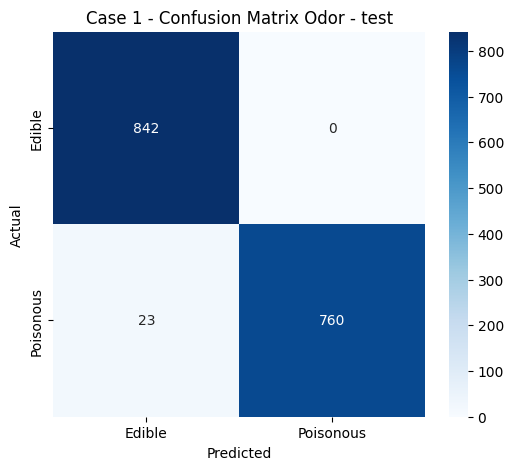

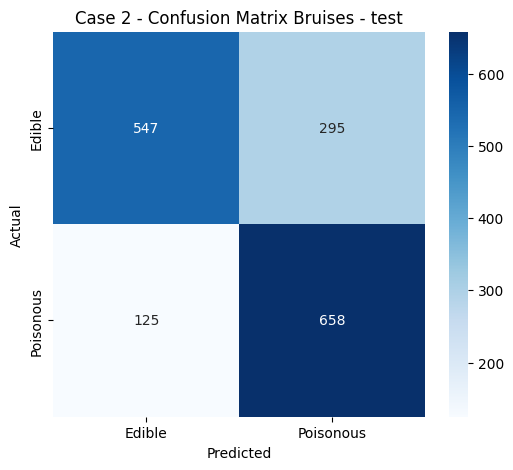

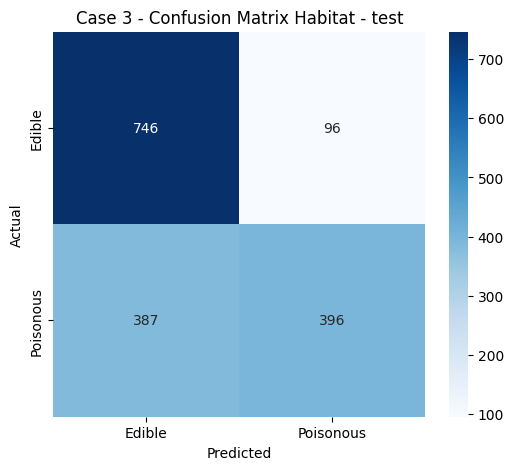

In [415]:
# Case 1: Confusion Matrix for 'odor'
y1_pred = tree_model1.predict(X1_test)
cm1 = confusion_matrix(y1_test, y1_pred, labels=['e', 'p'])  # use y1_test
plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title("Case 1 - Confusion Matrix Odor - test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Case 2: Confusion Matrix for 'bruises'
y2_pred = tree_model2.predict(X2_test)
cm2 = confusion_matrix(y2_test, y2_pred, labels=['e', 'p'])  # use y2_test
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title("Case 2 - Confusion Matrix Bruises - test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Case 3: Confusion Matrix for 'habitat'
y3_pred = tree_model3.predict(X3_test)
cm3 = confusion_matrix(y3_test, y3_pred, labels=['e', 'p'])  # use y3_test
plt.figure(figsize=(6, 5))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title("Case 3 - Confusion Matrix Habitat - test")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


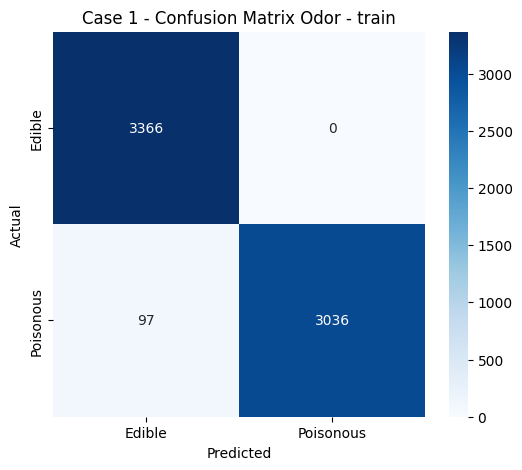

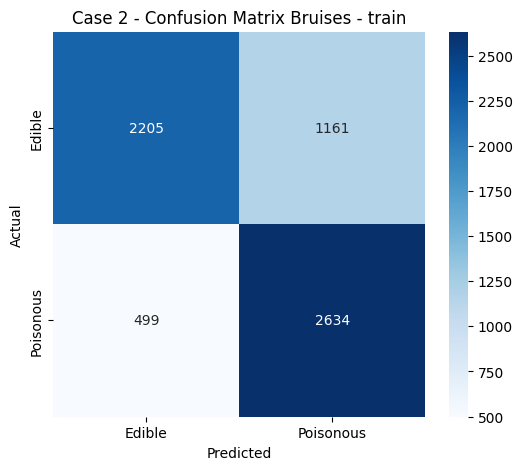

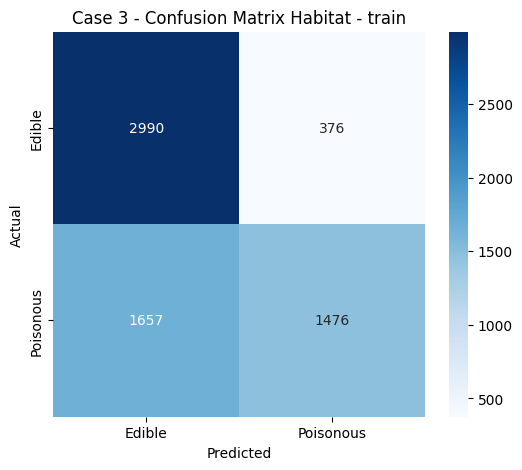

In [418]:
# Case 1: Confusion Matrix for 'odor'
y1_pred_train = tree_model1.predict(X1_train)
cm1 = confusion_matrix(y1_train, y1_pred_train, labels=['e', 'p'])  # use y1_train
plt.figure(figsize=(6, 5))
sns.heatmap(cm1, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title("Case 1 - Confusion Matrix Odor - train")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Case 2: Confusion Matrix for 'bruises'
y2_pred_train = tree_model2.predict(X2_train)
cm2 = confusion_matrix(y2_train, y2_pred_train, labels=['e', 'p'])  # use y2_train
plt.figure(figsize=(6, 5))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title("Case 2 - Confusion Matrix Bruises - train")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Case 3: Confusion Matrix for 'habitat'
y3_pred_train = tree_model3.predict(X3_train)
cm3 = confusion_matrix(y3_train, y3_pred_train, labels=['e', 'p'])  # use y3_train
plt.figure(figsize=(6, 5))
sns.heatmap(cm3, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title("Case 3 - Confusion Matrix Habitat - train")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Test
| Model Type        | Case   | Features Used     | Accuracy | Precision | Recall | F1-Score |
|------------|------|---------------|----------|-----------|--------|-----------|
| Decision Tree     | Case 1 | Odor            | 98%     | 100% | 97% | 98% | 
|                   | Case 2 | Brusies               | 74%    | 69% | 84% | 75% | 
|                   | Case 3 | Habitat | 70% | 80% | 50% | 62% | 

Training
| Model Type        | Case   | Features Used     | Accuracy | Precision | Recall | F1-Score |
|------------|------|---------------|----------|-----------|--------|-----------|
| Decision Tree     | Case 1 | Odor            | 98%     | 100% | 96% | 98% | 
|                   | Case 2 | Brusies               | 74%    | 69% | 84% | 76% | 
|                   | Case 3 | Habitat | 68% | 79% | 47% | 59% | 


__Reflection 4:__
- How well did the model perform? Any surprises in the results?
    - I think this worked really well 

## Section 5: Improve the Model or Try Alternatives

__5.1 Train an alternative classifier__

In [431]:
# Train a Random Forest model for Odor
rf_model1 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model1.fit(X1_train, y1_train.values.ravel())  # Flatten y1_train to a 1D array

# Predict on test set
rf_y1_pred = rf_model1.predict(X1_test)

# Evaluation
print("Random Forest - Case 1 ('odor')")
print(confusion_matrix(y1_test, rf_y1_pred))
print(classification_report(y1_test, rf_y1_pred))


Random Forest - Case 1 ('odor')
[[842   0]
 [ 23 760]]
              precision    recall  f1-score   support

           e       0.97      1.00      0.99       842
           p       1.00      0.97      0.99       783

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [432]:
# Train a Random Forest model for Bruises
rf_model2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model2.fit(X2_train, y2_train.values.ravel())  # Flatten y2_train to a 1D array

# Predict on the test set corresponding to Bruises
rf_y2_pred = rf_model2.predict(X2_test)

# Evaluation
print("Random Forest - Case 2 ('bruises')")
print(confusion_matrix(y2_test, rf_y2_pred))
print(classification_report(y2_test, rf_y2_pred))


Random Forest - Case 2 ('bruises')
[[547 295]
 [125 658]]
              precision    recall  f1-score   support

           e       0.81      0.65      0.72       842
           p       0.69      0.84      0.76       783

    accuracy                           0.74      1625
   macro avg       0.75      0.75      0.74      1625
weighted avg       0.75      0.74      0.74      1625



In [433]:
# Train a Random Forest model for Habitat
rf_model3 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model3.fit(X3_train, y3_train.values.ravel())  # Flatten y3_train to a 1D array

# Predict on the test set corresponding to Habitat
rf_y3_pred = rf_model3.predict(X3_test)

# Evaluation
print("Random Forest - Case 3 ('habitat')")
print(confusion_matrix(y3_test, rf_y3_pred))
print(classification_report(y3_test, rf_y3_pred))


Random Forest - Case 3 ('habitat')
[[746  96]
 [387 396]]
              precision    recall  f1-score   support

           e       0.66      0.89      0.76       842
           p       0.80      0.51      0.62       783

    accuracy                           0.70      1625
   macro avg       0.73      0.70      0.69      1625
weighted avg       0.73      0.70      0.69      1625



__5.2 Compare performance of all models across the same performance metrics__

Random Forest
| Model Type        | Case   | Features Used     | Accuracy | Precision | Recall | F1-Score |
|------------|------|---------------|----------|-----------|--------|-----------|
| Random Forest     | Case 1 | Odor            | 99%     | 99% | 99% | 99% | 
|                   | Case 2 | Brusies               | 74%    | 75% | 74% | 74% | 
|                   | Case 3 | Habitat | 70% | 73% | 70% | 69% | 


Decision Tree- Test
| Model Type        | Case   | Features Used     | Accuracy | Precision | Recall | F1-Score |
|------------|------|---------------|----------|-----------|--------|-----------|
| Decision Tree     | Case 1 | Odor            | 98%     | 100% | 97% | 98% | 
|                   | Case 2 | Brusies               | 74%    | 69% | 84% | 75% | 
|                   | Case 3 | Habitat | 70% | 80% | 50% | 62% | 



__Reflection 5:__
- *Which model performed better?* 
    - I pulled down the Decision Tree Test numbers to compare to Random Forest. Comparing across the board we can see taht the Random Forest model performs the same or better than the Decision Tree. I think both of these models performed very well and I would chose to use one of these for future projects. 
- *Why might one classifier be more effective in this specific case?*
    - The data in the project is complex and non linear, Random Forest is better equip to work with the data. 

## Section 6: Final Thoughts & Insights